# Hlasování

## Nastavení prostředí

In [1]:
if 'google.colab' in str(get_ipython()):
        import os, sys
        os.chdir('/content')
        print('Nastavení prostředí Google Colab.')
        ! git clone "https://github.com/jarbes/snemovna.git" --branch master
        sys.path.insert(0,'/content/snemovna')
        os.chdir('/content/snemovna')

In [2]:
! pip install -r requirements.txt

You should consider upgrading via the '/home/borjana/.venv/finance/bin/python3.7 -m pip install --upgrade pip' command.


## Import knihoven

In [3]:
from datetime import datetime, timedelta

import plotly.express as px
import plotly.graph_objects as go

import pandas as pd
import numpy as np

In [4]:
from snemovna.Hlasovani import Hlasovani, Omluvy, HlasovaniPoslanci, ZpochybneniHlasovani, ZmatecneHlasovani
from snemovna.PoslanciOsoby import Poslanci, Organy, ZarazeniOsoby
from snemovna.Stenotexty import Stenotexty
from snemovna.Schuze import Schuze
from snemovna.utility import groupby_bar, sort_column_by_predefined_order
from nastav_jupyter_notebook import nastav_pandas

In [5]:
# nastavení výpisu, například zobrazení delších textů v sloupcích tabulek
nastav_pandas()

## Nastavení

In [6]:
clean_layout = dict(
    plot_bgcolor="#FFFFFF",
)

y_spikes = dict(
    yaxis=dict(
        linecolor="#BCCCDC",
        showspikes=True,
        spikethickness=1,
        spikedash="dot",
        spikecolor="#999999",
        spikemode="across",

    )
)

x_spikes = dict(
    xaxis=dict(
        linecolor="#BCCCDC",
        showspikes=True,
        spikethickness=1,
        spikedash="dot",
        spikecolor="#999999",
        spikemode="across",

    )
)

clean_layout_with_x_spikes = {**clean_layout, **x_spikes}
clean_layout_with_y_spikes = {**clean_layout, **y_spikes}
clean_layout_with_xy_spikes = {**clean_layout, **x_spikes, **y_spikes}

categorical_scale1 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [7]:
# formát výpisu data
format_den = "%d. %m. %Y"

## Načtení tabulek

In [8]:
stahni=True

In [9]:
# načti informace o poslancích (jméno, příjemní, za koho kandidovali, etc.)
p = Poslanci(stahni=stahni)
print(p.columns)
p.head(2)

2021-03-18:10:00:45 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/poslanci.zip'.
2021-03-18:10:00:46 WARNING  [Snemovna.py:149] While merging 'funkce' with 'typ_funkce': Dropping ['typ_organ_obecny__typ_funkce', 'nazev_typ_organ_en__typ_funkce', 'id_typ_organ__typ_funkce', 'nazev_typ_organ_cz__typ_funkce', 'typ_id_typ_organ__typ_funkce'] because of abundance.


Index(['id_poslanec', 'id_osoba', 'id_kraj', 'id_kandidatka', 'id_organ',
       'web', 'ulice', 'obec', 'psc', 'email', 'telefon', 'fax', 'psp_telefon',
       'facebook', 'foto', 'pred', 'prijmeni', 'jmeno', 'za', 'narozeni',
       'zmena', 'umrti', 'pohlavi', 'adresa', 'sirka', 'delka',
       'nazev_kandidatka_cz', 'zkratka_kandidatka', 'nazev_kraj_cz',
       'zkratka_kraj', 'id_parlament', 'od_parlament', 'do_parlament',
       'id_klub', 'nazev_klub_cz', 'zkratka_klub', 'od_klub', 'do_klub'],
      dtype='object')


id_poslanec  id_osoba  id_kraj  id_kandidatka  id_organ   web  \
index                                                                  
0             1521      5700      588            155       172  <NA>   
1             1522      6254      581           1104       172  <NA>   

                                                                        ulice  \
index                                                                           
0      Vančurovo nám. 663                                                       
1      Dobronická 1257                                                          

                                                                         obec  \
index                                                                           
0      Hradec Králové                                                           
1      Praha 4 - Kunratice                                                      

         psc             email  ...       nazev_kraj_cz zkratka_kraj  \
index                           ...                                    
0      50002    adameci@psp.cz  ...     Královéhradecký           HK   
1      14800  adamkovav@psp.cz  ...  Hlavní město Praha           PH   

      id_parlament              od_parlament  do_parlament id_klub  \
index                                                                
0              172 2017-10-21 14:00:00+02:00           NaT    1295   
1              172 2017-10-21 14:00:00+02:00           NaT    1292   

                                      nazev_klub_cz zkratka_klub  \
index                                                              
0      Poslanecký klub Občanské demokratické strany          ODS   
1                          Poslanecký klub ANO 2011          ANO   

                        od_klub do_klub  
index                                    
0     2017-10-24 00:00:00+02:00     NaT  
1     2017-10-24 00:00:00+02:00     NaT  

[2 rows x 38 columns]

In [10]:
zo = ZarazeniOsoby(stahni=stahni)
print(zo.columns)
zo.head(2)

2021-03-18:10:00:47 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/poslanci.zip'.
2021-03-18:10:00:48 WARNING  [Snemovna.py:149] While merging 'funkce' with 'typ_funkce': Dropping ['typ_organ_obecny__typ_funkce', 'nazev_typ_organ_en__typ_funkce', 'id_typ_organ__typ_funkce', 'nazev_typ_organ_cz__typ_funkce', 'typ_id_typ_organ__typ_funkce'] because of abundance.


Index(['id_osoba', 'id_of', 'cl_funkce__ORIG', 'od_o', 'do_o', 'od_f', 'do_f',
       'cl_funkce', 'pred', 'prijmeni', 'jmeno', 'za', 'narozeni',
       'pohlavi__ORIG', 'zmena', 'umrti', 'pohlavi', 'id_organ',
       'organ_id_organ', 'id_typ_organ', 'zkratka', 'nazev_organ_cz',
       'nazev_organ_en', 'od_organ', 'do_organ', 'cl_organ_base',
       'typ_id_typ_organ', 'nazev_typ_organ_cz', 'nazev_typ_organ_en',
       'typ_organ_obecny', 'id_funkce', 'id_typ_funkce', 'nazev_funkce_cz',
       'priorita', 'typ_funkce_cz', 'typ_funkce_en', 'typ_funkce_obecny__ORIG',
       'typ_funkce_obecny'],
      dtype='object')


id_osoba  id_of  cl_funkce__ORIG                      od_o do_o od_f  \
index                                                                         
38            4    172                0 2017-10-21 14:00:00+02:00  NaT  NaT   
95            4   1295                0 2017-10-24 00:00:00+02:00  NaT  NaT   

      do_f cl_funkce pred prijmeni  ... nazev_typ_organ_en typ_organ_obecny  \
index                               ...                                       
38     NaT  členství         Benda  ...         Parliament             <NA>   
95     NaT  členství         Benda  ...    Political Group                1   

      id_funkce id_typ_funkce nazev_funkce_cz priorita typ_funkce_cz  \
index                                                                  
38         <NA>          <NA>            <NA>     <NA>          <NA>   
95         <NA>          <NA>            <NA>     <NA>          <NA>   

       typ_funkce_en  typ_funkce_obecny__ORIG  typ_funkce_obecny  
index                                                             
38              <NA>                     <NA>               <NA>  
95              <NA>                     <NA>               <NA>  

[2 rows x 38 columns]

In [11]:
# načti informace o schůzích PS (kdy začaly, v jakém jsou stavu, etc.)
sch = Schuze(stahni=stahni)
print(sch.columns)
sch.head(2)

2021-03-18:10:00:49 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/poslanci.zip'.
2021-03-18:10:00:50 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/schuze.zip'.


Index(['id_schuze', 'id_org', 'schuze', 'od_schuze', 'do_schuze',
       'aktualizace', 'pozvanka', 'text_dt', 'text_st', 'tm_line', 'stav',
       'typ'],
      dtype='object')


id_schuze  id_org  schuze                 od_schuze  \
0        469     172       1 2017-11-20 13:00:00+01:00   
1        469     172       1 2017-11-20 13:00:00+01:00   

                  do_schuze       aktualizace        pozvanka text_dt text_st  \
0                       NaT  2017-11-08 08:58  navržený pořad    <NA>    <NA>   
1 2017-11-24 14:09:00+01:00  2017-11-24 14:09            <NA>    <NA>    <NA>   

  tm_line stav    typ  
0    <NA>   OK  řádná  
1    <NA>   OK  řádná

In [12]:
# načti informace o jednotlivých hlasováních
h = Hlasovani(stahni=stahni)
print(h.columns)
h.head(2)

2021-03-18:10:00:51 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/poslanci.zip'.
2021-03-18:10:00:52 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/hl-2017ps.zip'.


Index(['id_hlasovani', 'id_organ', 'schuze', 'cislo', 'bod', 'cas', 'pro',
       'proti', 'zdrzel', 'nehlasoval', 'prihlaseno', 'kvorum', 'nazev_dlouhy',
       'nazev_kratky', 'datum', 'bod__KAT', 'vysledek', 'druh_hlasovani',
       'ma_zpochybneni', 'je_zmatecne', 'ma_stenozaznam', 'turn', 'typ'],
      dtype='object')


id_hlasovani  id_organ  schuze  cislo  bod       cas  pro  proti  zdrzel  \
0         67018       172       1      1    3  13:53:00  191      0       5   
1         67019       172       1      2    3  13:53:00  194      0       4   

   nehlasoval  ...  nazev_kratky                     datum  bod__KAT vysledek  \
0           0  ...          <NA> 2017-11-20 13:53:00+01:00  normální  přijato   
1           0  ...          <NA> 2017-11-20 13:53:00+01:00  normální  přijato   

  druh_hlasovani ma_zpochybneni je_zmatecne ma_stenozaznam  turn   typ  
0       normální          False        True          False  <NA>  <NA>  
1       normální          False       False          False  <NA>  <NA>  

[2 rows x 23 columns]

In [13]:
zph = ZpochybneniHlasovani(stahni=stahni)
print(zph.columns)
zph.head()

2021-03-18:10:00:54 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/poslanci.zip'.
2021-03-18:10:00:54 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/hl-2017ps.zip'.
2021-03-18:10:00:59 WARNING  [Snemovna.py:149] While merging 'zpochybneni' with 'hlasovani': Dropping ['turn__hlasovani'] because of abundance.
2021-03-18:10:00:59 WARNING  [Snemovna.py:184] Pro sloupec 'je_platne' nebyla nalezena metadata!


Index(['id_hlasovani', 'turn', 'mode', 'id_h2', 'id_h3', 'mode__KAT',
       'je_platne', 'id_organ', 'schuze', 'cislo', 'bod', 'datum__ORIG', 'cas',
       'pro', 'proti', 'zdrzel', 'nehlasoval', 'prihlaseno', 'kvorum',
       'druh_hlasovani__ORIG', 'vysledek__ORIG', 'nazev_dlouhy',
       'nazev_kratky', 'datum', 'bod__KAT', 'vysledek', 'druh_hlasovani',
       'ma_zpochybneni', 'je_zmatecne', 'ma_stenozaznam', 'typ__ORIG', 'typ'],
      dtype='object')


id_hlasovani  turn  mode  id_h2  id_h3           mode__KAT  je_platne  \
0         55680    67     0  55681  55682  žádost o opakování       True   
1         55664    43     0  55665  55666  žádost o opakování       True   
2         55590   244     0  55591  55592  žádost o opakování       True   
3         55561   200     0  55562  55563  žádost o opakování       True   
4         55555   199     0  55556  55557  žádost o opakování       True   

   id_organ  schuze  cislo  ...  nazev_kratky datum bod__KAT  vysledek  \
0      <NA>    <NA>   <NA>  ...          <NA>   NaT     <NA>      <NA>   
1      <NA>    <NA>   <NA>  ...          <NA>   NaT     <NA>      <NA>   
2      <NA>    <NA>   <NA>  ...          <NA>   NaT     <NA>      <NA>   
3      <NA>    <NA>   <NA>  ...          <NA>   NaT     <NA>      <NA>   
4      <NA>    <NA>   <NA>  ...          <NA>   NaT     <NA>      <NA>   

   druh_hlasovani  ma_zpochybneni  je_zmatecne  ma_stenozaznam  typ__ORIG  \
0            <NA>             NaN          NaN             NaN       <NA>   
1            <NA>             NaN          NaN             NaN       <NA>   
2            <NA>             NaN          NaN             NaN       <NA>   
3            <NA>             NaN          NaN             NaN       <NA>   
4            <NA>             NaN          NaN             NaN       <NA>   

    typ  
0  <NA>  
1  <NA>  
2  <NA>  
3  <NA>  
4  <NA>  

[5 rows x 32 columns]

In [14]:
zmh = ZmatecneHlasovani(stahni=stahni)
print(zmh.columns)
zmh.head()

2021-03-18:10:00:59 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/poslanci.zip'.
2021-03-18:10:01:00 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/hl-2017ps.zip'.


Index(['id_hlasovani', 'id_organ', 'schuze', 'cislo', 'bod', 'datum__ORIG',
       'cas', 'pro', 'proti', 'zdrzel', 'nehlasoval', 'prihlaseno', 'kvorum',
       'druh_hlasovani__ORIG', 'vysledek__ORIG', 'nazev_dlouhy',
       'nazev_kratky', 'datum', 'bod__KAT', 'vysledek', 'druh_hlasovani',
       'ma_zpochybneni', 'je_zmatecne', 'ma_stenozaznam', 'turn', 'typ__ORIG',
       'typ'],
      dtype='object')


id_hlasovani  id_organ  schuze  cislo   bod datum__ORIG  cas   pro  proti  \
0          6018      <NA>    <NA>   <NA>  <NA>        <NA>  NaN  <NA>   <NA>   
1          7496      <NA>    <NA>   <NA>  <NA>        <NA>  NaN  <NA>   <NA>   
2          7506      <NA>    <NA>   <NA>  <NA>        <NA>  NaN  <NA>   <NA>   
3          7854      <NA>    <NA>   <NA>  <NA>        <NA>  NaN  <NA>   <NA>   
4          7934      <NA>    <NA>   <NA>  <NA>        <NA>  NaN  <NA>   <NA>   

   zdrzel  ...  datum  bod__KAT  vysledek druh_hlasovani ma_zpochybneni  \
0    <NA>  ...    NaT      <NA>      <NA>           <NA>            NaN   
1    <NA>  ...    NaT      <NA>      <NA>           <NA>            NaN   
2    <NA>  ...    NaT      <NA>      <NA>           <NA>            NaN   
3    <NA>  ...    NaT      <NA>      <NA>           <NA>            NaN   
4    <NA>  ...    NaT      <NA>      <NA>           <NA>            NaN   

  je_zmatecne ma_stenozaznam  turn typ__ORIG   typ  
0         NaN            NaN  <NA>      <NA>  <NA>  
1         NaN            NaN  <NA>      <NA>  <NA>  
2         NaN            NaN  <NA>      <NA>  <NA>  
3         NaN            NaN  <NA>      <NA>  <NA>  
4         NaN            NaN  <NA>      <NA>  <NA>  

[5 rows x 27 columns]

In [15]:
# načti indiviuální hlasování poslanců
hp = HlasovaniPoslanci(stahni=stahni)
print(hp.columns)
hp.head(2)

2021-03-18:10:01:02 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/poslanci.zip'.
2021-03-18:10:01:03 WARNING  [Snemovna.py:149] While merging 'funkce' with 'typ_funkce': Dropping ['typ_organ_obecny__typ_funkce', 'nazev_typ_organ_en__typ_funkce', 'id_typ_organ__typ_funkce', 'nazev_typ_organ_cz__typ_funkce', 'typ_id_typ_organ__typ_funkce'] because of abundance.
2021-03-18:10:01:04 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/hl-2017ps.zip'.


Index(['id_hlasovani', 'nazev_dlouhy', 'vysledek', 'id_poslanec', 'id_osoba',
       'pred', 'jmeno', 'prijmeni', 'id_klub', 'nazev_klub_cz', 'zkratka_klub',
       'narozeni', 'pohlavi', 'za', 'id_kraj', 'nazev_kraj_cz', 'zkratka_kraj',
       'id_kandidatka', 'nazev_kandidatka_cz', 'zkratka_kandidatka', 'schuze',
       'cislo', 'bod', 'cas', 'datum', 'bod__KAT', 'druh_hlasovani',
       'ma_zpochybneni', 'id_parlament', 'id_organ', 'od_klub', 'do_klub',
       'je_zmatecne'],
      dtype='object')


id_hlasovani                                     nazev_dlouhy vysledek  \
index                                                                           
0             67018  Inf. o ustavení volební komise PS a volbě členů      ano   
1             67018  Inf. o ustavení volební komise PS a volbě členů      ano   

       id_poslanec  id_osoba         pred jmeno  prijmeni  id_klub  \
index                                                                
0             1521      5700         Mgr.  Ivan    Adamec     1295   
1             1522      6254  prof. MUDr.  Věra  Adámková     1292   

                                      nazev_klub_cz  ...       cas  \
index                                                ...             
0      Poslanecký klub Občanské demokratické strany  ...  13:53:00   
1                          Poslanecký klub ANO 2011  ...  13:53:00   

                          datum  bod__KAT druh_hlasovani  ma_zpochybneni  \
index                                                                      
0     2017-11-20 13:53:00+01:00  normální       normální           False   
1     2017-11-20 13:53:00+01:00  normální       normální           False   

      id_parlament id_organ                   od_klub do_klub je_zmatecne  
index                                                                      
0              172      172 2017-10-24 00:00:00+02:00     NaT        True  
1              172      172 2017-10-24 00:00:00+02:00     NaT        True  

[2 rows x 33 columns]

In [16]:
assert hp.id_osoba.nunique() <= p.id_osoba.nunique() or print("Nekonzistence v tabulkách 'HlasovaniPoslanci' a 'Poslanci': hlasujících poslanců je méně než těch, kteří hlasovali!")

In [17]:
# načti omluvy poslanců ze schůze PS
om = Omluvy(stahni=stahni)
print(om.columns)
om.head(2)

2021-03-18:10:01:27 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/poslanci.zip'.
2021-03-18:10:01:28 WARNING  [Snemovna.py:149] While merging 'funkce' with 'typ_funkce': Dropping ['typ_organ_obecny__typ_funkce', 'nazev_typ_organ_en__typ_funkce', 'id_typ_organ__typ_funkce', 'nazev_typ_organ_cz__typ_funkce', 'typ_id_typ_organ__typ_funkce'] because of abundance.
2021-03-18:10:01:29 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/hl-2017ps.zip'.
2021-03-18:10:01:32 WARNING  [Snemovna.py:149] While merging 'omluvy' with 'poslanci': Dropping ['id_organ__poslanci'] because of abundance.


Index(['id_organ', 'id_poslanec', 'den__ORIG', 'od__ORIG', 'do__ORIG', 'od',
       'do', 'den', 'id_osoba', 'id_kraj', 'id_kandidatka', 'web', 'ulice',
       'obec', 'psc', 'email', 'telefon', 'fax', 'psp_telefon', 'facebook',
       'foto', 'pred', 'prijmeni', 'jmeno', 'za', 'narozeni', 'pohlavi__ORIG',
       'zmena', 'umrti', 'pohlavi', 'adresa', 'sirka', 'delka',
       'nazev_kandidatka_cz', 'zkratka_kandidatka', 'nazev_kraj_cz',
       'zkratka_kraj', 'id_parlament', 'od_parlament', 'do_parlament',
       'id_klub', 'nazev_klub_cz', 'zkratka_klub', 'od_klub', 'do_klub',
       'je_poslanec'],
      dtype='object')


id_organ  id_poslanec   den__ORIG od__ORIG do__ORIG   od   do  \
index                                                                  
21451       172         1554  20.11.2017     <NA>     <NA>  NaN  NaN   
21452       172         1533  22.11.2017     <NA>     <NA>  NaN  NaN   

                            den  id_osoba  id_kraj  ...  zkratka_kraj  \
index                                               ...                 
21451 2017-11-20 00:00:00+01:00      5261      581  ...            PH   
21452 2017-11-22 00:00:00+01:00      6002      590  ...             V   

      id_parlament              od_parlament do_parlament id_klub  \
index                                                               
21451          172 2017-10-21 14:00:00+02:00          NaT    1293   
21452          172 2017-10-21 14:00:00+02:00          NaT    1294   

                                            nazev_klub_cz zkratka_klub  \
index                                                                    
21451   Poslanecký klub Komunistické strany Čech a Moravy         KSČM   
21452  Poslanecký klub České strany sociálně demokratické         ČSSD   

                        od_klub do_klub je_poslanec  
index                                                
21451 2017-10-24 00:00:00+02:00     NaT        True  
21452 2017-10-27 00:00:00+02:00     NaT        True  

[2 rows x 46 columns]

In [18]:
assert om[om.je_poslanec].id_osoba.nunique() <= p.id_osoba.nunique() or print("Nekonzistence v tabulkách 'Omluvy' a 'Poslanci': osob je méně než osob, které se omlouvali!")

In [19]:
# Stenotexty zde nebudeme potřebovat
#st = Stenotexty(stahni=stahni)
#print(st.columns)
#st.head()

## Analýza

In [20]:
volebni_obdobi = h.volebni_obdobi
snemovna = h.snemovna

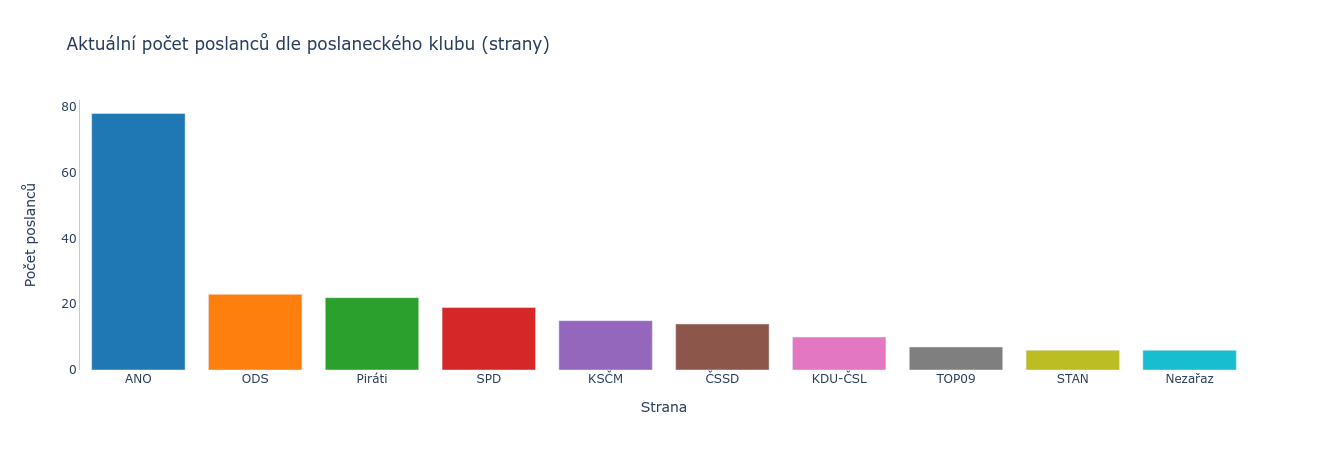

In [21]:
pocet_poslancu_dle_klubu =  p[p.do_parlament.isna()].groupby('zkratka_klub').size().sort_values(ascending=False)

fig = go.Figure(go.Bar(
    x=pocet_poslancu_dle_klubu.index,
    y=pocet_poslancu_dle_klubu.values,
    marker=dict(
        color=list(range(len(pocet_poslancu_dle_klubu.index))),
        colorscale=categorical_scale1
    ),
    hovertemplate="<b>%{x}</b><br>Počet poslanců: %{y}<extra></extra>"
))

layout = go.Layout(
    title="Aktuální počet poslanců dle poslaneckého klubu (strany)",    
    xaxis=dict(title="Strana", type='category'),
    yaxis=dict(title="Počet poslanců")
)

fig.update_layout(clean_layout_with_y_spikes)
fig.update_layout(layout)

fig.show()

## Kdy se konaly schůze PS?

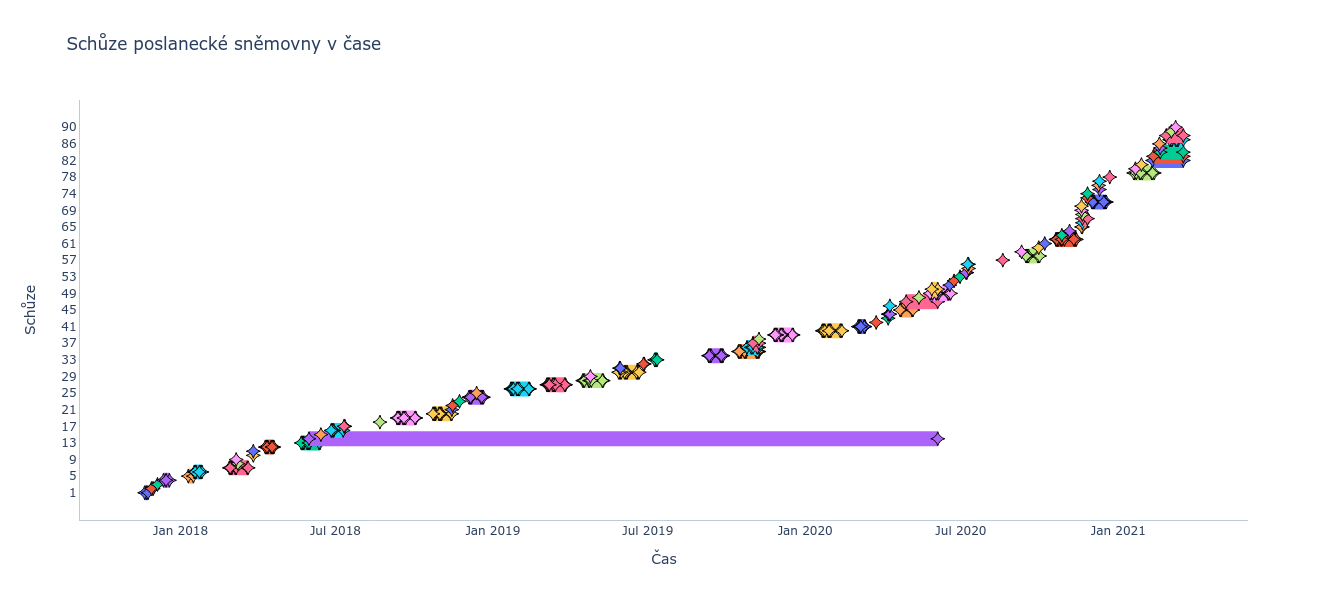

In [22]:
fig = go.Figure()

schuze = sch[sch.pozvanka.isna()]
for _, s in schuze.iterrows():
    id_schuze = s.schuze
    dny_hlasovani = h[h.schuze == id_schuze].datum.dt.date.unique()
    od = s.od_schuze
    do = sch.tzn.localize(datetime.today()) if pd.isna(s.do_schuze) else s.do_schuze
    dny = [od.date()] + [d for d in dny_hlasovani if (d >= od.date()) and ((d <= do.date()) | pd.isna(do))] + [do.date()]
    dny = list(set(dny))
    datum_hovertemplate = f"od {od.strftime(format_den)}" if pd.isna(s.do_schuze) \
        else f"{od.strftime(format_den)} - {s.do_schuze.strftime(format_den)}"
    tm_line_hovertemplate= '' if pd.isna(s.tm_line) else s.tm_line
    fig.add_trace(go.Scatter(
        x=dny,
        y=[s.schuze]*len(dny),
        text=s.schuze,
        hovertemplate=f"Schůze {s.schuze}<br>" \
            "Datum: %{x}<br>"\
            f"Trvání schůze: {datum_hovertemplate}<br>"\
            f"Typ schůze: {s.typ}<br>" \
            f"{tm_line_hovertemplate}<extra></extra>",
        mode="lines+markers",
        line = dict(shape='linear', width=15),
        marker = dict(symbol='star-diamond', size=10),
     ))
fig.update_traces(marker=dict(line=dict(width=1, color='black'))) 

fig.update_layout(clean_layout_with_xy_spikes)
layout = go.Layout(
    title="Schůze poslanecké sněmovny v čase",    
    xaxis=dict(title="Čas"),
    yaxis=dict(title="Schůze", type='category'),
    height=600,
    showlegend=False
)
fig.update_layout(layout)


fig.show()

## Počty hlasování

Na schůzích [10, 21, 71] se nehlasovalo.


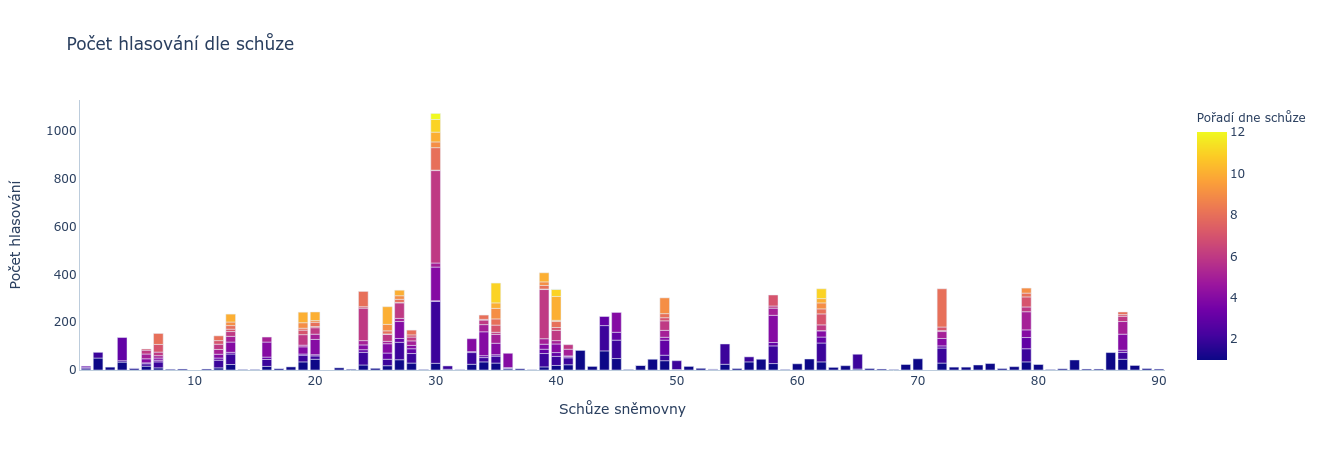

In [23]:
import plotly.express as px
h["pocet_dni_na_schuzi"] = h.groupby(["schuze"]).datum.transform('nunique')

h['den'] = h.datum.dt.date
h["den_schuze"] = h.groupby(["schuze", h.datum.dt.date]).ngroup()
h["den_schuze_min"] = h.groupby(["schuze"]).den_schuze.transform(min)
h["den_schuze_rank"] = (h["den_schuze"] - h["den_schuze_min"] + 1)

x1 = h.groupby(["schuze", 'den', "den_schuze_rank"]).size()
z1 = x1.reset_index(name="pocet_hlasovani")

print(f"Na schůzích {sorted(set(range(z1.schuze.max() + 1)) - set(z1.schuze.unique()) - set([0]))} se nehlasovalo.")
fig = px.bar(z1, x="schuze", y="pocet_hlasovani",
            color="den_schuze_rank",
            hover_data=['schuze', 'den_schuze_rank', 'pocet_hlasovani', 'den'],
            labels={'schuze':'Schůze', 'den': 'Datum', 'den_schuze_rank': 'Pořadí dne schůze', 'pocet_hlasovani': 'Počet hlasování'},
            title="Počet hlasování dle dne schůze")

layout = go.Layout(
    title="Počet hlasování dle schůze",    
    plot_bgcolor="#FFFFFF",
    #hovermode="x",
    #hoverdistance=100, # Distance to show hover label of data point
    #spikedistance=1000, # Distance to show spike
    xaxis=dict(
        title="Schůze sněmovny",
        linecolor="#BCCCDC",
        #type='category'
    ),
    yaxis=dict(
        title="Počet hlasování",
        linecolor="#BCCCDC",
        showspikes=True,
        spikethickness=1,
        spikedash="dot",
        spikecolor="#999999",
        spikemode="across",
    )
)

fig.update_layout(layout)

## Hlasování dle data

Nejvíce hlasování (387) se uskutečnilo 2019-06-05.
Nejméně hlasování (1) se uskutečnilo 2018-07-12.


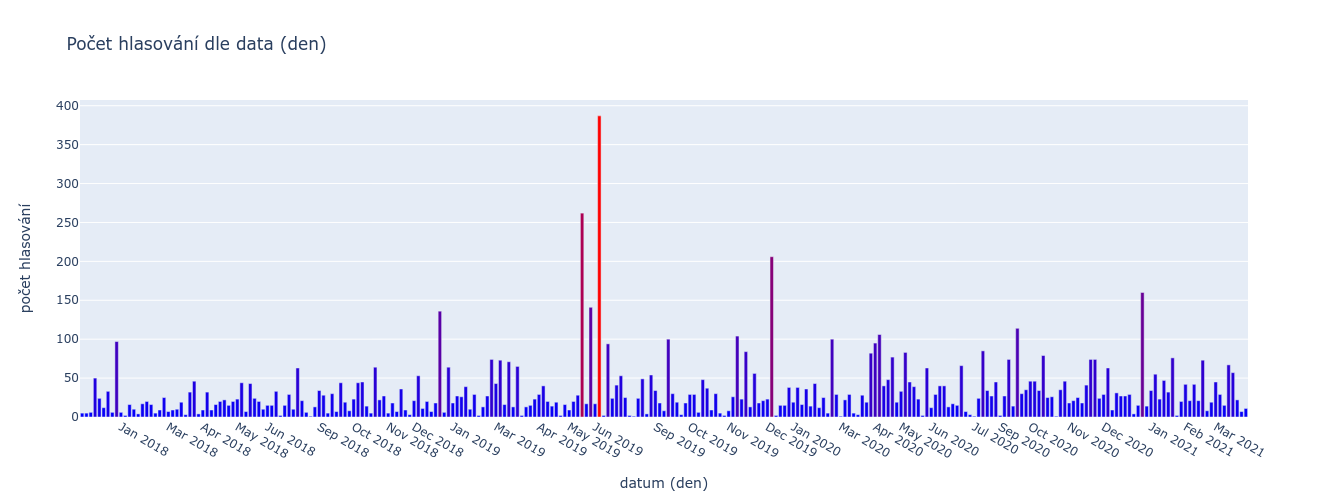

In [24]:
def pocet_hlasovani_dle_data(df, resample_to, resample_str, resample_label):
    frame = df.set_index('datum').resample(resample_to).size()
    frame = frame.mask(frame == 0, None).dropna()

    max_idx = frame.sort_values().index[-1]
    min_idx = frame.sort_values().index[0]
    print(f"Nejvíce hlasování ({frame.loc[max_idx]}) se uskutečnilo {max_idx.strftime(resample_str)}.")
    print(f"Nejméně hlasování ({frame.loc[min_idx]}) se uskutečnilo {min_idx.strftime(resample_str)}.")

    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=frame.index,
        y=frame.values,
        marker=dict(
            color=frame.values,
            colorscale='Bluered'
        ),

        hovertemplate="%{x}<br>počet hlasování: %{y}<extra></extra>"
    ))
    
    fig.update_layout(
        title=f"Počet hlasování dle data ({resample_label})",
        xaxis_title=f"datum ({resample_label})",
        yaxis_title="počet hlasování",
        width=1200,
        height=500
    )

    dt_all = pd.date_range(start=frame.index[0],end=frame.index[-1])
    dt_obs = [d.strftime(resample_str) for d in frame.index]
    dt_breaks = [d for d in dt_all.strftime(resample_str).tolist() if not d in dt_obs]
    # nezobrazuj data bez hlasování
    #dt_all = pd.date_range(start=df.index[0], end=df.index[-1])
    #dt_obs = [d.strftime(resample_str) for d in df.index]
    #dt_breaks = [d for d in dt_all.strftime(resample_str).tolist() if not d in dt_obs]

    fig.update_xaxes(
        rangebreaks=[dict(values=dt_breaks)]
    )
    
    fig.show()
pocet_hlasovani_dle_data(h, "D", "%Y-%m-%d", "den")

## Omluvy poslanců z hlasování

In [25]:
# Za hlasovací dny označujeme takové, během nichž se sešla Sněmovna a o něčem se hlasovalo.
# TODO: Existují dny, kdy se konala schůze PS, ale o ničem se nehlasovalo? Jak je najdeme?
minimalni_pocet_hlasovacich_dni = 30

hlasovaci_dny = pd.to_datetime(h.datum.dt.date.unique()).tz_localize(h.tzn)
pocet_hlasovacich_dni = len(hlasovaci_dny)

In [26]:
def fce_pocet_omluvenych_dni(id_poslanec):
    return om[(om.je_poslanec) & (om.id_poslanec == id_poslanec)].den.dt.date.nunique()

p['pocet_omluvenych_dni'] = p.id_poslanec.apply(fce_pocet_omluvenych_dni).astype('Int64')
assert p[p['pocet_omluvenych_dni'] > pocet_hlasovacich_dni].index.size == 0, \
    f"Chyba ve výpočtu. Počet omluvenych dní poslance musí být menší než {pocet_hlasovacich_dni}."

p['pocet_hlasovacich_dni'] = p.apply(lambda row: 
        len(hlasovaci_dny[(hlasovaci_dny >= row['od_parlament'])
        & ((hlasovaci_dny <= row['do_parlament']) | pd.isna(row['do_parlament']))])
        , axis=1).astype('Int64')
assert p[p['pocet_hlasovacich_dni'] > pocet_hlasovacich_dni].index.size == 0,\
    f"Chyba ve výpočtu. Počet hlasovacích dní poslance musí být menší než {pocet_hlasovacich_dni}."

p['pomer_omluvenych_dni'] = p['pocet_omluvenych_dni'] / p['pocet_hlasovacich_dni']
assert p[
    (p.pocet_hlasovacich_dni > minimalni_pocet_hlasovacich_dni)
    & ((p['pomer_omluvenych_dni'] > 1) | (p['pomer_omluvenych_dni'] < 0))].index.size == 0,\
    f"Chyba ve výpočtu. Poměr omluvených dní poslance musí být v intervalu [0, 1]]."

In [27]:
if pd.isna(h.snemovna.do_organ):
    print(f"Sněmovna {volebni_obdobi} se začala scházet {snemovna.od_organ.strftime(format_den)}.")
    if len(h) > 0:
        print(f"Naposledy se hlasovalo {h.datum.sort_values().dt.strftime(format_den).iloc[-1]}.")
else:
    print(f"Sněmovna {volebni_obdobi} se začala scházet {snemovna.od_organ.strftime(format_den)} a skončila {snemovna.do_organ.strftime(format_den)}.")

print(f"Hlasovalo se během {pocet_hlasovacich_dni} dní.")

Sněmovna 2017 se začala scházet 21. 10. 2017.
Naposledy se hlasovalo 12. 03. 2021.
Hlasovalo se během 271 dní.


Průměrný poměr omluvených dnů: 0.40.
Medián poměr omluvených dnů: 0.37.


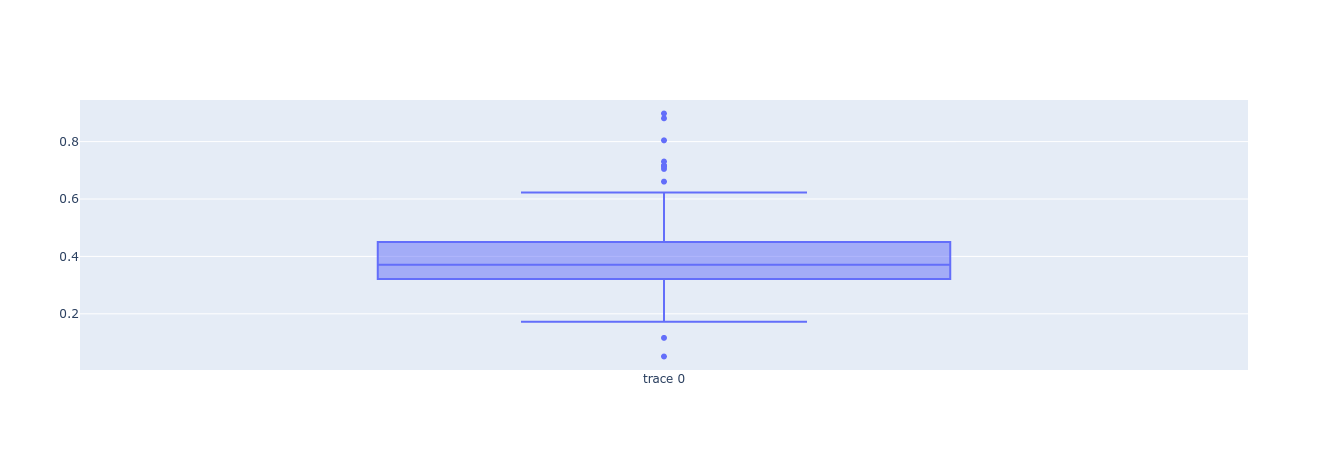

In [28]:
print(f"Průměrný poměr omluvených dnů: {p[p.pocet_hlasovacich_dni >= minimalni_pocet_hlasovacich_dni].pomer_omluvenych_dni.mean():.2f}.")
print(f"Medián poměr omluvených dnů: {p[p.pocet_hlasovacich_dni >= minimalni_pocet_hlasovacich_dni].pomer_omluvenych_dni.median():.2f}.")

fig = go.Figure(go.Box(y=p[p.pocet_hlasovacich_dni >= minimalni_pocet_hlasovacich_dni].pomer_omluvenych_dni))
fig.show()

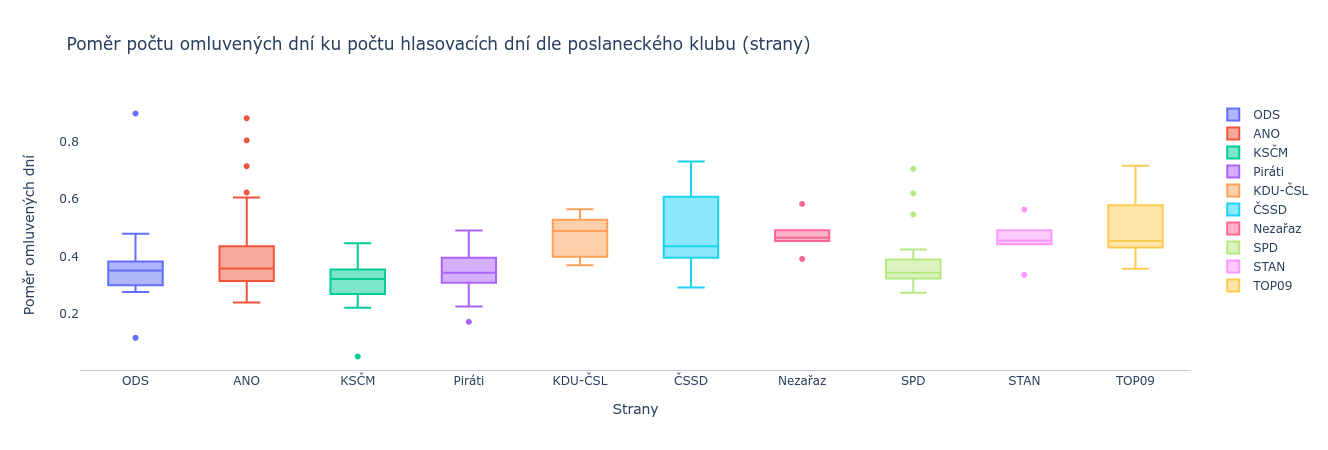

In [29]:
fig = go.Figure()

for zkratka_klub in p.zkratka_klub.unique():
    data = p[(p.zkratka_klub == zkratka_klub) & (p.pocet_hlasovacich_dni >= minimalni_pocet_hlasovacich_dni)]
    fig.add_trace(go.Box(y=data.pomer_omluvenych_dni, name=zkratka_klub))

layout = go.Layout(
    title="Poměr počtu omluvených dní ku počtu hlasovacích dní dle poslaneckého klubu (strany)",    
    xaxis=dict(title="Strany", type='category'),
    yaxis=dict(title="Poměr omluvených dní")
)

fig.update_layout(clean_layout_with_x_spikes)
fig.update_layout(layout)

fig.show()

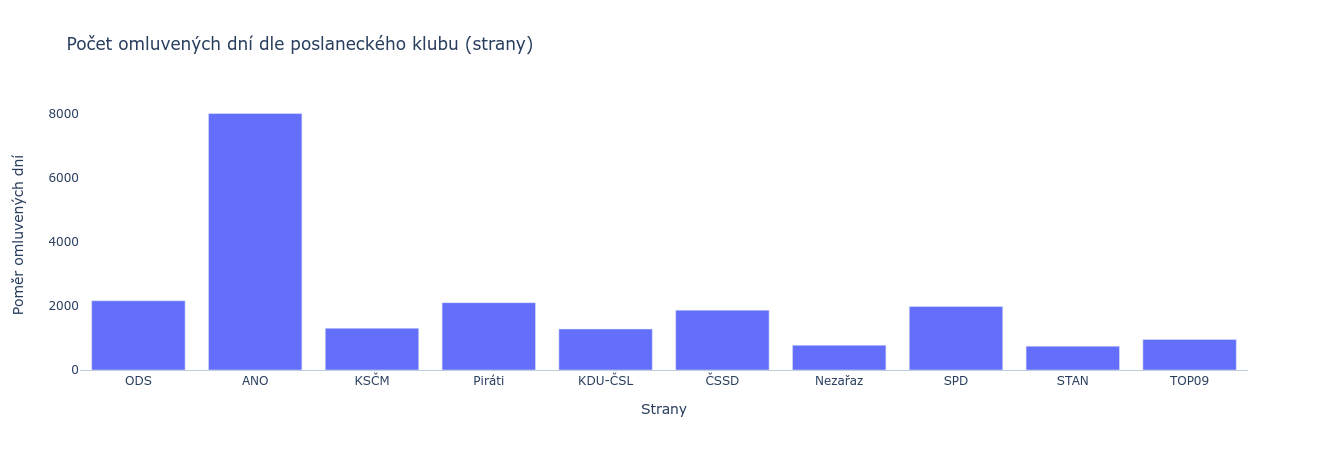

In [30]:
data = pd.DataFrame([])
for zkratka_klub in p.zkratka_klub.unique():
    v = p[(p.zkratka_klub == zkratka_klub) & (p.pocet_hlasovacich_dni >= minimalni_pocet_hlasovacich_dni)].pocet_omluvenych_dni.sum()
    data.loc[zkratka_klub, 'pocet_omluvenych_dni'] = v
    
fig = go.Figure()

fig.add_trace(go.Bar(x=data.index, y=data.pocet_omluvenych_dni))
    
layout = go.Layout(
    title="Počet omluvených dní dle poslaneckého klubu (strany)",    
    xaxis=dict(title="Strany", type='category'),
    yaxis=dict(title="Poměr omluvených dní")
)

fig.update_layout(clean_layout_with_x_spikes)
fig.update_layout(layout)

fig.show()

In [31]:
print(f"Průměrný počet omluvených dnů: {p[(p.pocet_hlasovacich_dni >= minimalni_pocet_hlasovacich_dni)].pocet_omluvenych_dni.mean():.1f}.")
print(f"Medián počtu omluvených dnů: {p[(p.pocet_hlasovacich_dni >= minimalni_pocet_hlasovacich_dni)].pocet_omluvenych_dni.median():.1f}.")

Průměrný počet omluvených dnů: 100.7.
Medián počtu omluvených dnů: 97.0.


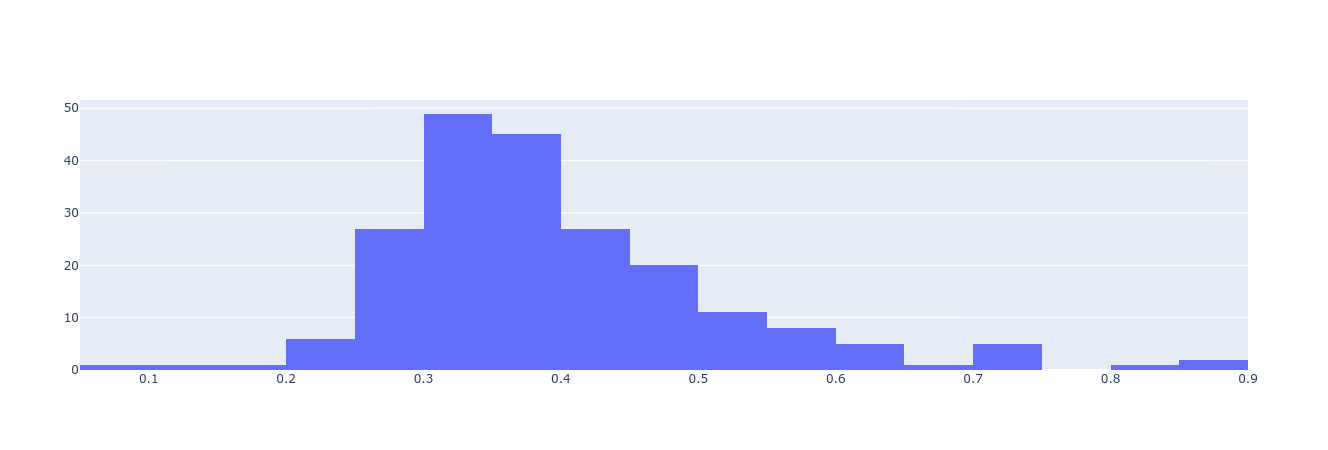

In [32]:
go.Figure(go.Histogram(x=p[(p.pocet_hlasovacich_dni >= minimalni_pocet_hlasovacich_dni)].pomer_omluvenych_dni))

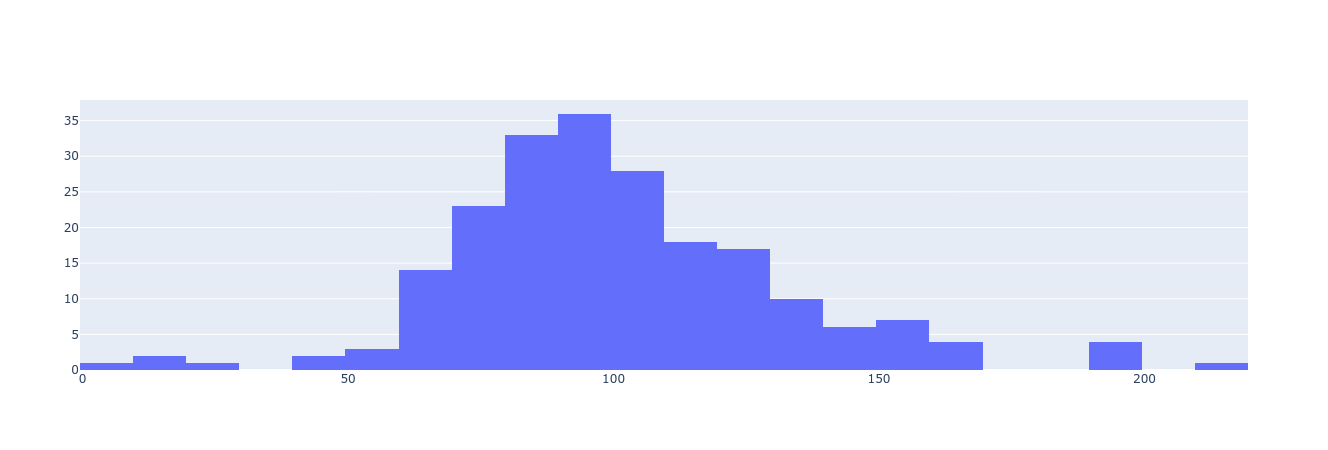

In [33]:
go.Figure(go.Histogram(x=p[(p.pocet_hlasovacich_dni >= minimalni_pocet_hlasovacich_dni)].pocet_omluvenych_dni))

In [34]:
cnt = 10
print(f"Poslanci s nejmenším počtem dnů, během nichž se omluvali z hlasování PS.")
fields = ['id_poslanec', 'jmeno', 'prijmeni', 'pomer_omluvenych_dni', 'pocet_omluvenych_dni', 'pocet_hlasovacich_dni', 'zkratka_klub']
p[(p.pocet_hlasovacich_dni >= minimalni_pocet_hlasovacich_dni)].sort_values(by="pocet_omluvenych_dni")[fields].head(cnt)

Poslanci s nejmenším počtem dnů, během nichž se omluvali z hlasování PS.


id_poslanec     jmeno    prijmeni  pomer_omluvenych_dni  \
index                                                            
86            1608  Vladimír     Koníček              0.051282   
132           1654    Robert     Pelikán              0.297872   
191           1713  Veronika  Vrecionová              0.116279   
131           1653   Mikuláš       Peksa              0.172131   
213           1735  Jaroslav     Vymazal              0.897959   
164           1686    Martin  Stropnický              0.714286   
212           1734     Irena    Blažková              0.881356   
190           1712      Petr       Vrána              0.259434   
64            1586     Milan    Chovanec              0.556604   
32            1554      Jiří      Dolejš              0.221402   

       pocet_omluvenych_dni  pocet_hlasovacich_dni zkratka_klub  
index                                                            
86                        4                     78         KSČM  
132                      14                     47          ANO  
191                      15                    129          ODS  
131                      21                    122       Piráti  
213                      44                     49          ODS  
164                      45                     63          ANO  
212                      52                     59          ANO  
190                      55                    212          ANO  
64                       59                    106         ČSSD  
32                       60                    271         KSČM

In [35]:
cnt = 10
print(f"Poslanci s největším počtem dnů, během nichž se omluvali z hlasování PS.")
fields = ['id_poslanec', 'jmeno', 'prijmeni', 'pomer_omluvenych_dni', 'pocet_omluvenych_dni', 'pocet_hlasovacich_dni', 'zkratka_klub']
p[(p.pocet_hlasovacich_dni >= minimalni_pocet_hlasovacich_dni)].sort_values(by="pocet_omluvenych_dni")[::-1][fields].head(cnt)

Poslanci s největším počtem dnů, během nichž se omluvali z hlasování PS.


id_poslanec    jmeno       prijmeni  pomer_omluvenych_dni  \
index                                                              
3             1524   Andrej          Babiš              0.804428   
161           1683  Antonín         Staněk              0.730627   
12            1533     Jiří       Běhounek              0.715867   
158           1680    Karel  Schwarzenberg              0.715867   
101           1623     Jana         Levová              0.704797   
81            1603     Jiří          Kobza              0.619926   
19            1541      Jan          Birke              0.608856   
170           1692   Julius         Špičák              0.605166   
56            1578      Jan        Hamáček              0.605166   
63            1585   Tereza        Hyťhová              0.583026   

       pocet_omluvenych_dni  pocet_hlasovacich_dni zkratka_klub  
index                                                            
3                       218                    271          ANO  
161                     198                    271         ČSSD  
12                      194                    271         ČSSD  
158                     194                    271        TOP09  
101                     191                    271          SPD  
81                      168                    271          SPD  
19                      165                    271         ČSSD  
170                     164                    271          ANO  
56                      164                    271         ČSSD  
63                      158                    271      Nezařaz

In [36]:
cnt = 10
print(f"Poslanci s nejmenším poměrem dnů, během nichž se omluvali z hlasování PS.")
fields = ['id_poslanec', 'jmeno', 'prijmeni', 'pomer_omluvenych_dni', 'pocet_omluvenych_dni', 'pocet_hlasovacich_dni', 'zkratka_klub']
p[(p.pocet_hlasovacich_dni >= minimalni_pocet_hlasovacich_dni)].sort_values(by="pomer_omluvenych_dni")[fields].head(cnt)

Poslanci s nejmenším poměrem dnů, během nichž se omluvali z hlasování PS.


id_poslanec      jmeno    prijmeni  pomer_omluvenych_dni  \
index                                                             
86            1608   Vladimír     Koníček              0.051282   
191           1713   Veronika  Vrecionová              0.116279   
131           1653    Mikuláš       Peksa              0.172131   
32            1554       Jiří      Dolejš              0.221402   
107           1629      Tomáš    Martínek              0.225092   
41            1563      Milan     Feranec              0.239852   
97            1619      Roman     Kubíček              0.243542   
7             1528      Lukáš      Bartoň              0.243542   
18            1540  Stanislav    Berkovec              0.243542   
157           1679        Jan    Schiller              0.254032   

       pocet_omluvenych_dni  pocet_hlasovacich_dni zkratka_klub  
index                                                            
86                        4                     78         KSČM  
191                      15                    129          ODS  
131                      21                    122       Piráti  
32                       60                    271         KSČM  
107                      61                    271       Piráti  
41                       65                    271          ANO  
97                       66                    271          ANO  
7                        66                    271       Piráti  
18                       66                    271          ANO  
157                      63                    248          ANO

In [37]:
cnt = 10
print(f"Poslanci s největším poměrem dnů, během nichž se omluvali z hlasování PS.")
fields = ['id_poslanec', 'jmeno', 'prijmeni', 'pomer_omluvenych_dni', 'pocet_omluvenych_dni', 'pocet_hlasovacich_dni', 'zkratka_klub']
p[(p.pocet_hlasovacich_dni >= minimalni_pocet_hlasovacich_dni)].sort_values(by="pomer_omluvenych_dni")[::-1][fields].head(cnt)

Poslanci s největším poměrem dnů, během nichž se omluvali z hlasování PS.


id_poslanec     jmeno       prijmeni  pomer_omluvenych_dni  \
index                                                               
213           1735  Jaroslav        Vymazal              0.897959   
212           1734     Irena       Blažková              0.881356   
3             1524    Andrej          Babiš              0.804428   
161           1683   Antonín         Staněk              0.730627   
12            1533      Jiří       Běhounek              0.715867   
158           1680     Karel  Schwarzenberg              0.715867   
164           1686    Martin     Stropnický              0.714286   
101           1623      Jana         Levová              0.704797   
207           1729    Václav         Votava              0.660606   
172           1694       Dan            Ťok              0.622642   

       pocet_omluvenych_dni  pocet_hlasovacich_dni zkratka_klub  
index                                                            
213                      44                     49          ODS  
212                      52                     59          ANO  
3                       218                    271          ANO  
161                     198                    271         ČSSD  
12                      194                    271         ČSSD  
158                     194                    271        TOP09  
164                      45                     63          ANO  
101                     191                    271          SPD  
207                     109                    165         ČSSD  
172                      66                    106          ANO

## Jak se hlasuje?

Následující analýza slouží k tomu, abychom lépe pochopili, jakým způsobem se hlasujev PS ČR. Proč je tomu třeba rozumět? Některá hlasování (například hlasování o zpochybnění hlasování) mají technický charakter. V některých analýzách je může být vhodné vynechat.

###  Platnost hlasování
Přibližná pravidla pro určení platnosti hlasování:
- Hlasování může být označeno jako zmatečné. Zmatečné hlasování je neplatné.
- Hlasování může být zpochybněno.
  - O zpochybnění se může hlasovat.
    - Pokud se o zpochybnění hlasování hlasuje a zpochybnění je přijato, dochází k opakovanému hlasování. Původní hlasování je neplatné.
      - V tabulce ZpochybněníHlasování je uveden identifikátor hlasování o zpochybnění hlasování (id_h2) a identifikátor opakovaného hlasování (id_h3).
      - Hlasování o zpochybnění hlasování lze zpochybnit.
      - Identifikátor opakovaného hlasování označuje první platné hlasování v řadě hlasování.
    - Pokud se o zpochybnění hlasování nehlasuje nebo pokud není zpochybnění hlasování přijato, je v tabulce ZpochybneniHlasování nastaveno 'pouze pro stenozáznam'. Původní hlasování zůstává platné.


In [38]:
hl_pocet = h.id_hlasovani.nunique()
zpochybneni = zph[zph.je_platne == True]
zm_hl = h[h.id_hlasovani.isin(zmh.id_hlasovani)]
zm_hl_pocet = zm_hl.id_hlasovani.nunique()
zp_hl = h[h.id_hlasovani.isin(zpochybneni.id_hlasovani)]
zp_hl_pocet = zp_hl.id_hlasovani.nunique()

pouze_v_tabulce_zpochybneni_pocet = len(set(zph.id_hlasovani) - set(h.id_hlasovani))
pouze_v_tabulce_zmatecne_pocet = len(set(zmh.id_hlasovani) - set(h.id_hlasovani))

print(f"Základní vlastnosti tabulky Hlasovani (pro sněmovnu  {h.volebni_obdobi}):")
print(f"- {hl_pocet} hlasování, z toho")
print(f"- {zm_hl_pocet} ({100 * (zm_hl_pocet / hl_pocet):.2f}%) hlasování bylo označeno za zmatečné,")
print(f"- {zp_hl_pocet} ({100 * (zp_hl_pocet / hl_pocet):.2f}%) hlasování bylo zpochybněno.")

df = zpochybneni[zpochybneni.mode__KAT == 'pouze pro stenozáznam']
v1 = h[h.id_hlasovani.isin(df.id_hlasovani)].id_hlasovani.nunique()
print(f"\t- {v1} hlasování z tabulky Hlasování bylo zpochybněno, ale zpochybnění bylo uvedeno jen pro stenozáznam.")

df = zpochybneni[zpochybneni.mode__KAT == 'žádost o opakování']
v1 = h[h.id_hlasovani.isin(df.id_hlasovani)].id_hlasovani.nunique()
print(f"\t- {v1} hlasování z tabulky Hlasování bylo zpochybněno s žádostí o opakování hlasování.")

df = zpochybneni[(zpochybneni.mode__KAT == 'žádost o opakování') & ~(zpochybneni.id_h2.isna()| zpochybneni.id_h3.isna())]
v1 = h[h.id_hlasovani.isin(df.id_hlasovani)].id_hlasovani.nunique()
print(f"\t\t- {v1} hlasování z tabulky Hlasování bylo zpochybněno s žádostí o opakování hlasování, o zpochybnění se hlasovalo a původní hlasování se následně opakovalo.")

df = zpochybneni[(zpochybneni.mode__KAT == 'žádost o opakování') & ~zpochybneni.id_h2.isna() & zpochybneni.id_h3.isna()]
v1 = h[h.id_hlasovani.isin(df.id_hlasovani)].id_hlasovani.nunique()
print(f"\t\t- {v1} hlasování z tabulky Hlasování bylo zpochybněno s žádostí o opakování hlasování, o zpochybnění se hlasovalo, ale původní hlasování se neopakovalo.")

print()
print(f"Dalších {pouze_v_tabulce_zpochybneni_pocet} hlasování je uvedeno pouze v tabulce ZpochybneniHlasovani. ")
print(f"Dalších {pouze_v_tabulce_zmatecne_pocet} hlasování je uvedeno pouze v tabulce ZmatecneHlasovani.")
print()
print(f"Celkově tedy proběhlo ve sněmovně až {hl_pocet + pouze_v_tabulce_zpochybneni_pocet + pouze_v_tabulce_zmatecne_pocet} hlasování.")
print()
print("Poznámka: Tabulka ZmatecneHlasovani nemá explicitně určenou vazbu na danou sněmovnu. Její propojení s tabulkou Hlasování bylo provedeno následující heuristikou: "
      "Pro danou sněmovnu se určí minimální a maximální identifikátor hlasování. Pro dané zmatečné hlasování pak musí platit, že min(id(hlasování)) <= id(zmatečného hlasování) <= max(id(hlasování)).")

Základní vlastnosti tabulky Hlasovani (pro sněmovnu  2017):
- 8700 hlasování, z toho
- 111 (1.28%) hlasování bylo označeno za zmatečné,
- 209 (2.40%) hlasování bylo zpochybněno.
	- 136 hlasování z tabulky Hlasování bylo zpochybněno, ale zpochybnění bylo uvedeno jen pro stenozáznam.
	- 73 hlasování z tabulky Hlasování bylo zpochybněno s žádostí o opakování hlasování.
		- 72 hlasování z tabulky Hlasování bylo zpochybněno s žádostí o opakování hlasování, o zpochybnění se hlasovalo a původní hlasování se následně opakovalo.
		- 1 hlasování z tabulky Hlasování bylo zpochybněno s žádostí o opakování hlasování, o zpochybnění se hlasovalo, ale původní hlasování se neopakovalo.

Dalších 512 hlasování je uvedeno pouze v tabulce ZpochybneniHlasovani. 
Dalších 684 hlasování je uvedeno pouze v tabulce ZmatecneHlasovani.

Celkově tedy proběhlo ve sněmovně až 9896 hlasování.

Poznámka: Tabulka ZmatecneHlasovani nemá explicitně určenou vazbu na danou sněmovnu. Její propojení s tabulkou Hlasování bylo 

In [39]:
def flatten(ary):
    return [x for l in ary for x in l]

def fce_mezi_hlasovanim_a_hlasovanim_o_zpochybneni_hlasovani_ids(row):
    if pd.isna(row['id_h2']):
        return []
    else:
        return list(range(row['id_hlasovani']+1, row['id_h2']))

# Hlasování o zpochybnění hlasování je možné také zkazit nebo zpochybnit.
# Mezi prvním hlasováním o zpochybnění a opakovaným hlasováním může proběhnout několik dalších zpochybněných nebo neplatných hlasování.
def fce_mezi_hlasovanim_o_zpochybneni_a_opakovanym_hlasovanim_ids(row):
    if pd.isna(row['id_h2']):
        return []
    elif pd.isna(row['id_h3']):
        return []
    else:
        return list(range(row['id_h2']+1, row['id_h3']))

mezi_hlasovanim_a_hlasovanim_o_zpochybneni_hlasovani_ids = \
    flatten(zpochybneni[zpochybneni.mode__KAT == 'žádost o opakování'].apply(fce_mezi_hlasovanim_a_hlasovanim_o_zpochybneni_hlasovani_ids, axis=1))

mezi_hlasovanim_o_zpochybneni_a_opakovanym_hlasovani_ids = \
    flatten(zpochybneni[zpochybneni.mode__KAT == 'žádost o opakování'].apply(fce_mezi_hlasovanim_o_zpochybneni_a_opakovanym_hlasovanim_ids, axis=1))

hlasovani_o_zpochybneni_ids = h[h.id_hlasovani.isin(zpochybneni.id_h2.unique())]

hlasovani_bez_zmatecnych_a_zpochybnenych = h[~h.id_hlasovani.isin(zmh.id_hlasovani)
                     & ~h.id_hlasovani.isin(zph[zph.mode__KAT == 'žádost o opakování'].id_hlasovani)
                     & ~h.id_hlasovani.isin(mezi_hlasovanim_o_zpochybneni_a_opakovanym_hlasovani_ids)
                     & ~h.id_hlasovani.isin(hlasovani_o_zpochybneni_ids)
]

# Míra jednomyslnosti hlasování

In [40]:
h_platne = hlasovani_bez_zmatecnych_a_zpochybnenych.copy()

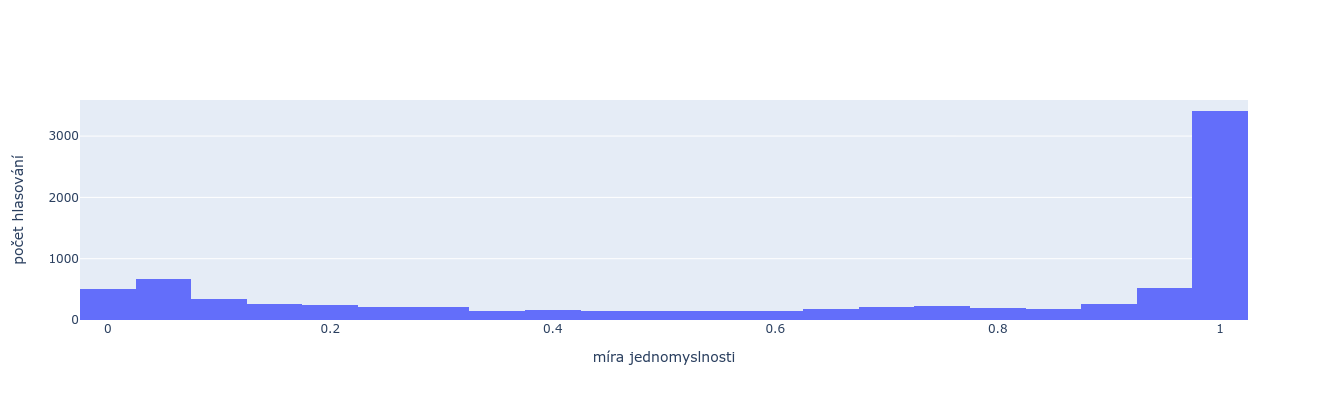

In [41]:
h_platne["mira_jednomyslnosti"] = (h_platne.pro - h_platne.proti).abs() / (h_platne.pro + h_platne.proti)
h_platne["mira_jednomyslnosti"].describe()

fig = go.Figure(go.Histogram(
    x=h_platne.mira_jednomyslnosti,
    hovertemplate="míra jednomyslnosti: %{x}<br>počet hlasování: %{y}<extra></extra>"))
fig.update_layout(width=700, height=400, xaxis=dict(title="míra jednomyslnosti"), yaxis=dict(title="počet hlasování"))
fig.show()

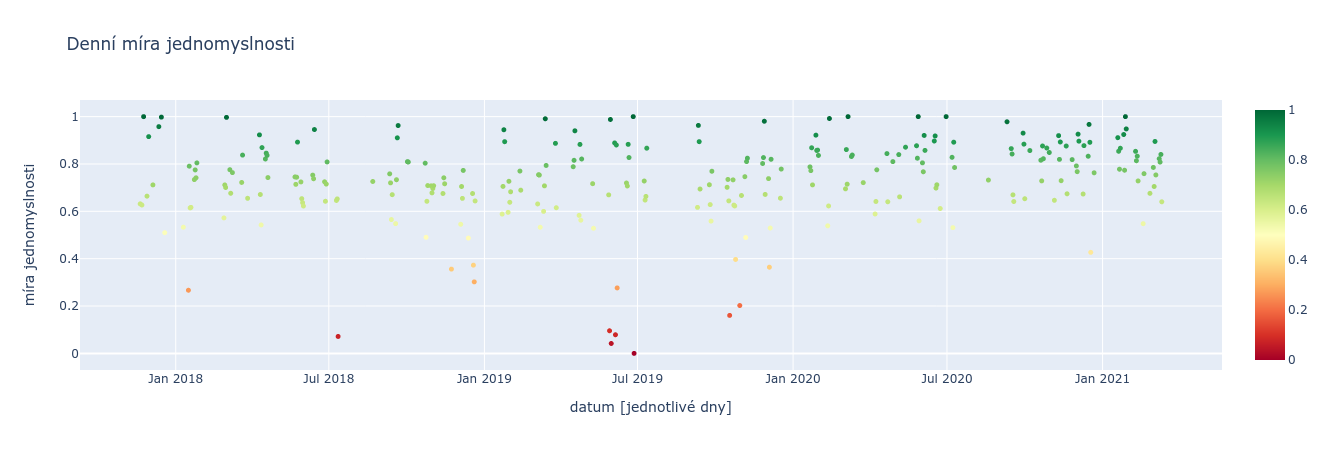

In [42]:
# denní míra jednomyslnosti

precision = 3 

def A_razeno_dle_B(x, A, B):
    df = x.groupby(A)[B].mean().sort_values(ascending=True)
    return("<br>".join(map(str, df.index.astype(str) + ': ' + df.values.round(precision).astype(str))))

days = 7
interval = f"{days}D"

df = pd.DataFrame()
df['mira_jednomyslnosti_za_den_mean'] = h_platne.groupby(h_platne.datum.dt.date).mira_jednomyslnosti.mean()
df['nazev_dlouhy_za_den'] = h_platne.groupby(h_platne.datum.dt.date)[['nazev_dlouhy', 'mira_jednomyslnosti']].apply(
    lambda x: A_razeno_dle_B(x, "nazev_dlouhy", "mira_jednomyslnosti")
) 
df.index = pd.to_datetime(df.index)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df.index,
    y=df.mira_jednomyslnosti_za_den_mean,
    text=df.nazev_dlouhy_za_den,
    name="míra jednomyslnosti za den",
    mode="markers",
     marker=dict(
        size=5,
        color=df.mira_jednomyslnosti_za_den_mean,
        colorscale='RdYlGn', # one of plotly colorscales
        showscale=True
    ),
    hovertemplate =
        '<b>%{x}</b>'+
        '<br><br><b>Průměrná míra jednomyslnosti</b>: <i>%{y:.3f}</i>'+
        '<br><br><b>Hlasování dle míry jednomyslnosti (vzestupně):</b><br>%{text}<extra></extra>',
    hoverlabel=dict(
        bgcolor='white',
        font=dict(color='black')
    )
))

fig.update_layout(title="Denní míra jednomyslnosti", xaxis=dict(title="datum [jednotlivé dny]"), yaxis=dict(title="míra jednomyslnosti"))

fig.show()

In [43]:
print(f"Jednomyslně schválená hlasování (vysoká míra jednomyslnosti): {h_platne[h_platne.mira_jednomyslnosti == 1].index.size}")
jednomyslna_temata = h_platne[h_platne.mira_jednomyslnosti == 1].groupby('nazev_dlouhy').size().sort_values(ascending=False)
print(jednomyslna_temata.head(20))

Jednomyslně schválená hlasování (vysoká míra jednomyslnosti): 3007
nazev_dlouhy
Pořad schůze                                                              518
                                                                          121
Návrh na vyslovení souhlasu PS s prodloužením doby nouzového stavu         68
Návrh na změny ve složení orgánů Poslanecké sněmovny                       59
Návrhy PS na propůjčení nebo udělení státních vyznamenání                  44
Vl.n.z. v souv.s elektronizací postupů orgánů veřejné moci                 33
Novela z. - školský zákon                                                  26
Návrhy Poslanecké sněmovny na propůjčení nebo udělení státních vyzname     24
Novela z. - trestní řád                                                    23
Novela z. o daních z příjmů                                                23
Novela z. o kompenzačním bonusu                                            23
Novela z. o státním rozpočtu ČR na rok 2020                   

In [44]:
print(f"Hlasování s nízkou mírou jednomyslnosti (zcela vyrovnané pro a proti)): {h_platne[h_platne.mira_jednomyslnosti == 0].index.size}")
nejednomyslna_temata = h_platne[h_platne.mira_jednomyslnosti == 0].groupby('nazev_dlouhy').size().sort_values(ascending=False)
print(nejednomyslna_temata.head(20))

Hlasování s nízkou mírou jednomyslnosti (zcela vyrovnané pro a proti)): 71
nazev_dlouhy
Novela z. o evidenci tržeb - EU                                 28
Pořad schůze                                                     7
Vl.n.z. o kompenzačním bonusu v souv. s krizovými opatřeními     5
Vl.n.z.o opatř.ke zmírnění dopadů SARS CoV-2 na nájemce byt.     2
Návrh na vyslovení nedůvěry vládě České republiky                2
Novela z. o rozpočtových pravidlech                              2
Vl.n.z. o státním rozpočtu ČR na rok 2021                        2
Novela z. - horní zákon                                          2
Novela z. o důchodovém pojištění                                 1
Novela z. o evidenci tržeb                                       1
Novela z. o státním občanství ČR                                 1
Novela z. o některých úpravách v oblasti evidence tržeb          1
Novela z. o bankách - EU                                         1
Novela z. o pomoci v hmotné nouzi        

In [45]:
# Témata hlasování s nejvyšší mírou jednomyslnosti a jejich počty

cnt = 5
x = pd.DataFrame()
x['celkovy_pocet_hlasovani_dle_tematu'] =  h_platne.groupby('nazev_dlouhy').size()
x['prumerna_mira_jednomyslnosti_dle_tematu'] = h_platne.groupby('nazev_dlouhy')['mira_jednomyslnosti'].mean()
x.sort_values(by='prumerna_mira_jednomyslnosti_dle_tematu', ascending=False).head(cnt)

celkovy_pocet_hlasovani_dle_tematu  \
nazev_dlouhy                                                                                       
Výroční zpráva o činnosti České televize v roce 2018                                           1   
Sml. mezi ČR a Běloruskem o důchodovém zabezpečení                                             2   
Výroční zpráva a účetní závěrka SFRB za rok 2016                                               1   
Sml.mezi ČR a vl.Rep.Kazachstán o spol.v boji proti tr.činn.                                   2   
Návrh Pravidel hospodaření poslaneckých klubů pro rok 2018                                     1   

                                                              prumerna_mira_jednomyslnosti_dle_tematu  
nazev_dlouhy                                                                                           
Výroční zpráva o činnosti České televize v roce 2018                                              1.0  
Sml. mezi ČR a Běloruskem o důchodovém zabezpečení                                                1.0  
Výroční zpráva a účetní závěrka SFRB za rok 2016                                                  1.0  
Sml.mezi ČR a vl.Rep.Kazachstán o spol.v boji proti tr.činn.                                      1.0  
Návrh Pravidel hospodaření poslaneckých klubů pro rok 2018                                        1.0

In [46]:
# Témata hlasování s nízkou mírou jednomyslnosti a jejich počty

cnt = 5
x = pd.DataFrame()
x['celkovy_pocet_hlasovani_dle_tematu'] =  h_platne.groupby('nazev_dlouhy').size()
x['prumerna_mira_jednomyslnosti_dle_tematu'] = h_platne.groupby('nazev_dlouhy')['mira_jednomyslnosti'].mean()
x.sort_values(by='prumerna_mira_jednomyslnosti_dle_tematu', ascending=False).tail(cnt)

celkovy_pocet_hlasovani_dle_tematu  \
nazev_dlouhy                                                                                                 
Písemná interpelace V. Munzara na A. Schillerovou                                                        1   
Novela z. o evidenci tržeb - EU                                                                        857   
Písemná interpelace V. Munzara na A. Schillerovou ve věci poruš. ústav                                   1   
Písemná interpelace V. Munzara na A. Schillerovou ve věci odměňování ú                                   1   
Návrh na vyslovení nedůvěry vládě České republiky                                                        3   

                                                                        prumerna_mira_jednomyslnosti_dle_tematu  
nazev_dlouhy                                                                                                     
Písemná interpelace V. Munzara na A. Schillerovou                                                      0.083333  
Novela z. o evidenci tržeb - EU                                                                        0.060626  
Písemná interpelace V. Munzara na A. Schillerovou ve věci poruš. ústav                                 0.054054  
Písemná interpelace V. Munzara na A. Schillerovou ve věci odměňování ú                                 0.038961  
Návrh na vyslovení nedůvěry vládě České republiky                                                      0.022556

## Podobnost hlasování poslanců

In [47]:
%%time

df = hp[hp.id_hlasovani.isin(h_platne.id_hlasovani)]
data = df[['id_osoba', 'id_hlasovani', 'vysledek', 'zkratka_klub']]\
    .set_index('id_osoba')\
    .sort_values(by=['zkratka_klub'])[['id_hlasovani', 'vysledek']]\
    .groupby('id_osoba', sort=False)\
    .apply(lambda g: list(map(tuple, g.values))).to_dict()

data = {osoba: [str(hl_idx) + '_' + vysledek for hl_idx, vysledek in data[osoba]] for osoba in data.keys()}

CPU times: user 6.75 s, sys: 428 ms, total: 7.18 s
Wall time: 7.19 s


In [48]:
%%time

def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

m = {}
for osoba1, v1 in data.items():
    if osoba1 not in m:
        m[osoba1] = {}
    for osoba2, v2 in data.items():
        m[osoba1][osoba2] = jaccard_similarity(v1, v2)

CPU times: user 46.6 s, sys: 4 ms, total: 46.6 s
Wall time: 46.7 s


In [49]:
korelace_df = pd.DataFrame(m)
osoby = {id_osoba: hp[hp.id_osoba == id_osoba][['jmeno', 'prijmeni', 'zkratka_kandidatka','nazev_kraj_cz', 'zkratka_klub']].iloc[0] for id_osoba in korelace_df}
jmeno_prijmeni = [f"{osoby[id_osoba]['jmeno']} {osoby[id_osoba]['prijmeni']}" for id_osoba in korelace_df.index]
zkratka_klub = [osoby[id_osoba]['zkratka_klub'] for id_osoba in korelace_df.index]
label = [f"{j} ({zk})" for j, zk in zip(jmeno_prijmeni, zkratka_klub)]

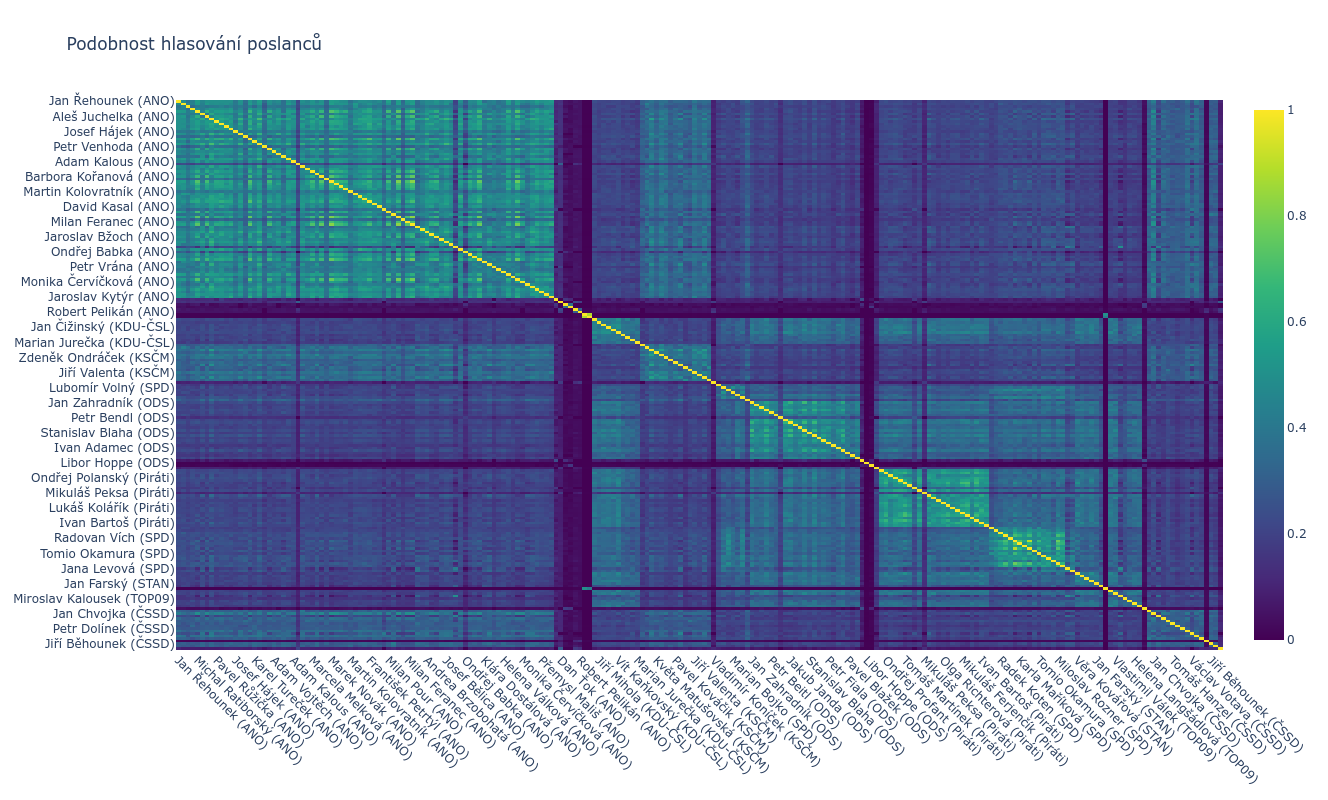

In [50]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Heatmap(
        z=korelace_df,
        x=label,
        y=label,
        colorscale='Viridis',
        hovertemplate="%{x}<br>%{y}<br>Podobnost hlasování: %{z}<extra></extra>"
))

fig.update_layout(title='Podobnost hlasování poslanců',  width=800, height=800)
fig.update_xaxes(type='category', tickangle=45)
fig.update_yaxes(type='category', autorange='reversed')
fig.show()

In [51]:
print(f"Poslední běh notebooku: {datetime.now().strftime('%d.%m.%Y %H:%M:%S')}.")

Poslední běh notebooku: 18.03.2021 10:02:39.
